In [1]:
%%html
<style>
h1 {
    text-align: center;
}

.term {
    text-align: center;
    margin-top: 1em;
    margin-bottom: 1em;
}

.organizers {
    text-align: center;
    margin-left: 20%;
    margin-right: 20%;
    margin-bottom: 1em;
}
</style>


In [2]:
import numpy as np
import torch
import random
import matplotlib
import matplotlib.pyplot as plt

print(f"NumPy version: {np.__version__}")
print(f"PyTorch version: {torch.__version__}")
print(f"Matplotlib version: {matplotlib.__version__}")

NumPy version: 1.26.4
PyTorch version: 2.2.2
Matplotlib version: 3.10.1


<h1 align="center">Python Programming for Machine Learning</h1>

<div class="term">Tensor Operations</div>

<div class="term">Winter Term 2024/2025</div>

<div class="organizers">
    Weronika Kłos
</div>

<center><img src='images/python-logo-only.svg' width=250> </center>
<br>
<div class="copyright" style="margin-top: 10px; font-size: 0.9em;">
    © 2024 Jannik Wolff. Original content created by Jannik Wolff.
</div>


Reminder:
- Lecturer: Have you started the recording?
- Audience: Have you received a notification that the recording has started?

# Lecture layout
### 1. **Motivation:** why is learning tensor operations important?
### 2. **Technical part:** how to code tensor operations?

# Motivation

## Semantics

<div style="display: flex; flex-direction: column; align-items: center; margin: 20px 0;">
  <div style="text-align: center;">
    <img src='images/tensors.jpg' width=500 style="border: 1px solid #f0f0f0;" alt="Tensors of different ranks">
  </div>
  <div style="width: 80%; margin-top: 10px; text-align: center;">
    <p style="font-weight: 500; margin-bottom: 4px; font-size: 0.95em;">Figure 1: Tensors of different ranks</p>
    <p style="font-size: 0.8em; color: #555; font-style: italic;">
      Source: Adapted from Ravi Ranjan (2020). <a href="https://squaredr.medium.com/5-ways-of-creating-tensors-1dbb874d2ca4" target="_blank" style="color: #1a73e8;">Blog post</a>
    </p>
  </div>
</div>


### Vector
- 1D datastructure
- Examples: text token sequences or amino acid sequences

### Matrix
- 2D datastructure with rows and columns:
- Example: Black/white image, where each value is a pixel

### Tensor
- Generalization of a matrix to more dimensions
- Vectors and matrices are special cases
- Example: Color image, where each pixel has three color channels

### Array
- Programming abstraction for tensors
- Example: tensors implemented in Python frameworks like NumPy or Torch

## Operators on arrays
- Element-wise operations
- Matrix multiplication
- ...

## Applications in machine learning
Somewhat simplified: Data + operators = machine learning models

Arrays and array operations are relevant almost everywhere in machine learning, e.g.:
- **Generative modeling:** Transformers, diffusion models, ...
- **Representation learning:** Decoder-free self-supervised learning, ...
- **Search:** Monte-Carlo Tree search, ...
- **Classical ML:** decision trees, ...

## Example from a real codebase
- [Attention implementation from Andrej Karpathy](https://github.com/karpathy/nanoGPT/blob/master/model.py#L52)
- You do not need to understand this function at this point


## Our goals

- Express complex data and complex functions operating on this data
- Efficiency in terms of computation/memory
- Readable/compact syntax

## Achieving our goals is difficult with the Python standard library
- Interpreted languages are slow for loops / can require redundant memory
- Native Python syntax unnecessarily verbose for some linear algebra operations (like complex indexing)

## Python libraries are more flexible
- Acceleration frameworks like NumPy or Torch:
  - Bindings to C code for efficiency
  - Compact expressions for complicated structures
- Two-language problem
  - Any specialized use-case requires writing code in two languages
  - Mainstream use cases: frameworks already exist

## Demo

<div style="display: flex; flex-direction: column; align-items: center; margin: 20px 0;">
  <div style="text-align: center;">
    <img src='images/single-layer-net.png' width=300 style="border: 1px solid #f0f0f0;" alt="Single layer neural network">
  </div>
  <div style="width: 80%; margin-top: 10px; text-align: center;">
    <p style="font-weight: 500; margin-bottom: 4px; font-size: 0.95em;">Figure 2: Single layer neural network architecture</p>
    <p style="font-size: 0.8em; color: #555; font-style: italic;">
      Source: <a href="https://lucidar.me/en/neural-networks/single-layer-algorithm/" target="_blank" style="color: #1a73e8;">Bolg post</a>
    </p>
  </div>
</div>

In [3]:
# Create input data
input_size = 784 # eg. flattened 28x28 images
output_size = 128
batch_size = 64

inputs = [[random.random() for _ in range(input_size)] for _ in range(batch_size)]
weights = [[random.random() for _ in range(output_size)] for _ in range(input_size + 1)]  # +1 for bias

# Add bias term
inputs = [input_sample + [1.0] for input_sample in inputs]

# Convert to numpy arrays
inputs_np = np.array(inputs)
weights_np = np.array(weights)
inputs_np.shape, weights_np.shape

((64, 785), (785, 128))

### Native Python

In [4]:
def forward_pass_python(inputs, weights):
    batch_output = []
    for sample in inputs:
        # Calculate output for one sample
        sample_output = []
        for j in range(len(weights[0])):  # For each output neuron
            # Dot product of input (with bias) and weights
            neuron_output = 0
            for i in range(len(sample)):
                neuron_output += sample[i] * weights[i][j]
            
            # Apply ReLU activation: max(0, x)
            sample_output.append(max(0, neuron_output))
        batch_output.append(sample_output)
    return batch_output

### Same operation in NumPy

In [5]:
def forward_pass_numpy(inputs, weights):
    return np.maximum(0, inputs @ weights)

In [6]:
np.allclose(
    forward_pass_python(inputs, weights),
    forward_pass_numpy(inputs_np, weights_np),
    atol=1e-6
)

True

In [7]:
time_py = %timeit -o -r 10 -n 10 forward_pass_python(inputs, weights)

189 ms ± 4.97 ms per loop (mean ± std. dev. of 10 runs, 10 loops each)


In [8]:
time_np = %timeit -o -r 10 -n 1000 forward_pass_numpy(inputs_np, weights_np)

240 μs ± 24.8 μs per loop (mean ± std. dev. of 10 runs, 1,000 loops each)


NumPy speedup: 786.18x


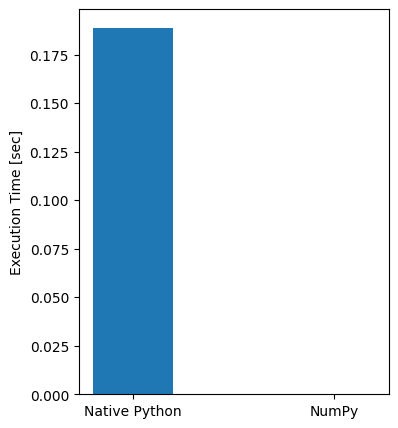

In [9]:
plt.figure(figsize=(4, 5))
plt.bar(['Native Python', 'NumPy'], [time_py.average, time_np.average], width=0.4)
plt.ylabel('Execution Time [sec]')
print(f"NumPy speedup: {time_py.average / time_np.average:.2f}x")

 # Technical part

<br>
<center>
<img src='images/num.png' width=600>
</center>
<br>
<center>
<img src='images/pytorch-logo-dark.png' width=600>
</center>

## NumPy
- Acceleration framework
- Initial release: 2006 (before deep learning was mainstream)
- Not optimized for GPUs
- Parts of this lecture are based on the [official documentation](https://numpy.org/doc/stable/user/basics.html)

* Use `pip install numpy` for installation
* `np` is an *alias* specified by the `as` keyword

In [10]:
import numpy as np

# Numpy version used by me in this lecture.
# Not that other lectures/the exam may use a different version.
# As of Nov 2024, we plan to use numpy 1.x (not 2.x) in the exam to avoid compatibility issues.
print(np.__version__)

1.26.4


## PyTorch
- Release year: 2016
- Optimized for GPU computation
- NumPy syntax often generalizes to GPU-acceleration frameworks like PyTorch
- [Documentation](https://pytorch.org/docs/stable/index.html)
- Install via `pip install torch`

In [11]:
import torch

# As of Nov 2024, we plan to use torch 2.x in the exam
print(torch.__version__)

2.2.2


## Further acceleration frameworks not covered in this lecture
- Similar level of abstraction as numpy/torch
  - JAX (e.g., good for JIT, TPUs)
  - Note: most frameworks with similar abstraction as numpy/torch have similar syntax (as this minimizes barrier of entry)
- Lower level of abstraction
  - Triton (e.g., good for custom GPU kernels)
- Higher level of abstraction
  - Keras (can use multiple backends like torch or JAX)

 ## Array creation

 ### Array creation from iterables

Create numpy arrays from iterables like lists or tuples:

In [12]:
array1 = np.array([1, 2, 3, 4])
array2 = np.array((1, 2.0, 3, 4))  # array datatype equivalent to highest-precision input type

array1, array2, array1.dtype, array2.dtype

(array([1, 2, 3, 4]),
 array([1., 2., 3., 4.]),
 dtype('int64'),
 dtype('float64'))

### Data types

Change datatype of existing array:

In [13]:
array = np.array([1, 2, 3])
array = array.astype(float)
array, array.dtype

(array([1., 2., 3.]), dtype('float64'))

Specify datatype for new array:

In [14]:
array = np.array([1, -2.9, 3.9, 3, 4], dtype=np.int32)

# floats are converted via truncation toward zero
array, array.dtype

(array([ 1, -2,  3,  3,  4], dtype=int32), dtype('int32'))

When applying an operator to two arrays of different types, the resulting array inherits the type of the highest-precision operand:

In [15]:
v1 = np.array([1, 2, 3], dtype='float64')
v2 = v1.astype('float32')
print(v1.dtype, v2.dtype)
(v1 + v2).dtype

float64 float32


dtype('float64')

Exemplary supported data types: `float64`, `float32`, `float16`, `int32`, `str` (usually no significant efficiency gain), `complex64`, `bool` ...

Arrays are instances of `np.ndarray` (use this for typing; `np.array` is a function used to create an array):

In [16]:
type(array1)

numpy.ndarray

In [17]:
array = np.ndarray([1, 2, 3])
array, array.shape

(array([[[0.78777778, 0.33722222, 0.78777778],
         [4.18722222, 3.88777778, 0.33722222]]]),
 (1, 2, 3))

Passing nested lists creates multi-dimensional arrays:

In [18]:
vector = np.array([1, 2])
matrix = np.array([[1, 2], [3, 4]])
tensor = np.array([[[1, 2], [3, 4]], [[5, 6], [7, 8]]])

for array in (vector, matrix, tensor):
    print(f'{array.ndim}-d array with shape: {array.shape}\n{array}\n')

1-d array with shape: (2,)
[1 2]

2-d array with shape: (2, 2)
[[1 2]
 [3 4]]

3-d array with shape: (2, 2, 2)
[[[1 2]
  [3 4]]

 [[5 6]
  [7 8]]]



### Array creation routines

In [19]:
np.ones((2, 2)), np.zeros(2), np.full(2, 1.23)

(array([[1., 1.],
        [1., 1.]]),
 array([0., 0.]),
 array([1.23, 1.23]))

Allocate memory without initializing values (less overhead than `np.zeros` or `np.full`):


In [20]:
# ATTENTION: uses garbage values at respective memory location, i.e., do not forget to overwrite
np.empty(2)

array([1.23, 1.23])

Creating sequences:

In [21]:
np.arange(3), np.linspace(0., 1., 3)

(array([0, 1, 2]), array([0. , 0.5, 1. ]))

Probability distribution: samples from uniform distribution over $[0, 1)$:

In [23]:
# Preferred syntax for newer code
rng = np.random.default_rng()  # random number generator (local state)
rng.random((3, 2))

array([[0.92760033, 0.39847221],
       [0.06310934, 0.54596067],
       [0.01321669, 0.60748942]])

In [24]:
# Backward compatible syntax
np.random.rand(2)  # global state: can create problems, e.g., for multi-threading

array([0.30195931, 0.01625658])

### Torch

Converting between numpy and torch (e.g., dataloading in numpy, neural net training in torch):

In [25]:
numpy_array = np.zeros(3)
# "arrays" are called "tensors" in torch
torch_tensor = torch.tensor(numpy_array)
numpy_array = torch_tensor.numpy()
numpy_array = np.array(torch_tensor)

Torch shares much of the numpy syntax, e.g.:

In [26]:
torch.tensor([1, 2])  # create tensor from iterable
torch.ones(2)  # array creation routine

tensor([1., 1.])

In [27]:
numpy_array.shape, torch_tensor.shape

((3,), torch.Size([3]))

In [28]:
tensor = torch.rand(4, 3, dtype=torch.float32)
print(tensor.dtype)
tensor = tensor.to(torch.float16)
print(tensor.dtype)

torch.float32
torch.float16


There are some minor syntactical differences, e.g.:

In [29]:
# torch additionally supports the `size()` method for retrieving the shape
try:
    numpy_array.size()
except TypeError:
    import traceback
    traceback.print_exc()

torch_tensor.shape, torch_tensor.size()

Traceback (most recent call last):
  File "/var/folders/6v/_tdl0v6d7t1069wv11zmprnm0000gn/T/ipykernel_98850/243870274.py", line 3, in <module>
    numpy_array.size()
TypeError: 'int' object is not callable


(torch.Size([3]), torch.Size([3]))

We cannot provide GPUs to students –> focus on CPU computation:

In [30]:
# CUDA (Compute Unified Device Architecture): NVIDIA's parallel computing platform
# Necessary for running code on NVIDIA GPUs
# Note: other GPU types/platforms exist (e.g., AMD)

if torch.cuda.is_available():
    # Simply move tensors to the GPU device
    # Torch handles the rest in the backend –> remaining syntax mostly identical
    tensor = torch.tensor([1, 2, 3]).to('cuda')
else:
    # Focus of this course
    tensor = torch.tensor([1, 2, 3])

Mac users can use [MPS](https://developer.apple.com/metal/pytorch/).

In [31]:
def get_device() -> str:
    """Returns the available device for torch.

    Returns:
        The GPU or the MPS device when available and the CPU device as a fallback.
    """
    if torch.cuda.is_available():
        return "cuda"
    elif torch.backends.mps.is_available():
        return "mps"
    else:
        return "cpu"

## Joining arrays

#### Stacking

Example use case: including data from different data sources to one data batch (e.g., images from different cameras)

In [32]:
v1 = np.ones(3)
v2 = np.ones(3)
np.stack((v1, v2)).shape

(2, 3)

In [33]:
v1 = torch.ones(3)
v2 = torch.ones(3)
torch.stack((v1, v2)).shape

torch.Size([2, 3])

#### Concatenation

Example use case in generative modeling: Concatenate tokens for different modalities (like images and text) and train Transformer on it (as in Meta's [Chameleon model](https://arxiv.org/abs/2405.09818))

In [34]:
v1 = np.ones(3)
v2 = np.ones(3)
np.concatenate((v1, v2)).shape

(6,)

In [35]:
v1 = torch.ones(3)
v2 = torch.ones(3)
torch.concatenate((v1, v2)).shape, torch.cat((v1, v2)).shape

(torch.Size([6]), torch.Size([6]))

`np.cat` is not implemented:

In [36]:
v1 = np.ones(3)
v2 = np.ones(3)

try:
    np.cat((v1, v2))
except AttributeError:
    import traceback
    traceback.print_exc()

Traceback (most recent call last):
  File "/var/folders/6v/_tdl0v6d7t1069wv11zmprnm0000gn/T/ipykernel_98850/2032947355.py", line 5, in <module>
    np.cat((v1, v2))
    ^^^^^^
  File "/Users/wero/Documents/teaching/pyml/lecture/.venv/lib/python3.12/site-packages/numpy/__init__.py", line 333, in __getattr__
    raise AttributeError("module {!r} has no attribute "
AttributeError: module 'numpy' has no attribute 'cat'. Did you mean: 'cast'?


## Indexing and Slicing

Numpy arrays support the same indexing and slicing operations that lists and tuples do:

In [37]:
array = np.arange(7)
array

array([0, 1, 2, 3, 4, 5, 6])

In [38]:
# Indexing
array[2]

2

In [39]:
# Slicing (creates views / uses already assigned memory)
array[2:], array[1:4], array[1::2], array[::-1]

(array([2, 3, 4, 5, 6]),
 array([1, 2, 3]),
 array([1, 3, 5]),
 array([6, 5, 4, 3, 2, 1, 0]))

NumPy arrays are mutable:
- We can modify values in-place without reallocating memory.
- Newly assigned values inherit array datatype.
- Certain operations (e.g., transposition) create a new array (more details later).

In [40]:
array = np.arange(5)
print(array)
array[3] = 5.5  # 5.5 is converted to array dtype (uses already assigned memory)
print(array)

[0 1 2 3 4]
[0 1 2 5 4]


Arrays support advanced indexing (not supported by lists/tuples):

In [41]:
array = np.arange(10) - 2
print(array)
array[[1, 4, 1]]  # multiple indices (this creates a copy in memory)

[-2 -1  0  1  2  3  4  5  6  7]


array([-1,  2, -1])

Pass another array as index:

In [42]:
indices = np.ones((3, 2), dtype='int')  # indices must be of type int
indices[0, :] = 0
indices[2, :] = 3

rng = np.random.default_rng()  # random number generator
array = rng.random((4, 3))

indices, array

(array([[0, 0],
        [1, 1],
        [3, 3]]),
 array([[0.48661056, 0.9960434 , 0.07506846],
        [0.70387724, 0.59494539, 0.95264342],
        [0.27824342, 0.23062858, 0.63568043],
        [0.35935992, 0.16698065, 0.95224841]]))

In [43]:
# 3 x 2 times (shape of `indices`), select column from `array`
array[indices].shape, array[indices]

((3, 2, 3),
 array([[[0.48661056, 0.9960434 , 0.07506846],
         [0.48661056, 0.9960434 , 0.07506846]],
 
        [[0.70387724, 0.59494539, 0.95264342],
         [0.70387724, 0.59494539, 0.95264342]],
 
        [[0.35935992, 0.16698065, 0.95224841],
         [0.35935992, 0.16698065, 0.95224841]]]))

### Indexing via tuples vs. lists/arrays

In [44]:
array = np.arange(6).reshape(2, 3)
array, array[(1, 0)]  # Retrieve the element at row 1, column 0

(array([[0, 1, 2],
        [3, 4, 5]]),
 3)

In [45]:
array[[0, 1]], array[np.array([0, 1])]  # Retrieve rows 0 and 1

(array([[0, 1, 2],
        [3, 4, 5]]),
 array([[0, 1, 2],
        [3, 4, 5]]))

### Torch

- Some minor differences in syntax to numpy.
- Exemplary reason: efficiency materializes different for GPUs and CPUs

#### Example: reverse slicing

Numpy: `[::-1]` creates a view

In [46]:
np.arange(4)[::-1]  # view: uses already assigned memory

array([3, 2, 1, 0])

Reverse striding not supported in torch:

In [47]:
import traceback
try:
    torch.tensor([1,2,3])[::-1]
except ValueError:
    traceback.print_exc()

Traceback (most recent call last):
  File "/var/folders/6v/_tdl0v6d7t1069wv11zmprnm0000gn/T/ipykernel_98850/25065265.py", line 3, in <module>
    torch.tensor([1,2,3])[::-1]
    ~~~~~~~~~~~~~~~~~~~~~^^^^^^
ValueError: step must be greater than zero


Reverse tensor using dedicated function:

In [48]:
torch.arange(4).flip(0)  # creates new tensor (not a view)

tensor([3, 2, 1, 0])

## Boolean arrays

Recall the Python standard library:

In [49]:
True == 1, False == 0
True and True, 1 * 1

(True, 1)

Arrays support boolean types:

In [50]:
array = np.arange(3) - 1

array, array.dtype, (array > 0), (array > 0).dtype   # Broadcasting

(array([-1,  0,  1]),
 dtype('int64'),
 array([False, False,  True]),
 dtype('bool'))

#### Logical AND
Returns `True` if both values are `True`

In [51]:
mask1 = array < 1
mask2 = array > -1

# Element-wise comparison (numpy overloads dunder methods __and__ and __mul__)
mask1, mask2, mask1 & mask2, mask1 * mask2

(array([ True,  True, False]),
 array([False,  True,  True]),
 array([False,  True, False]),
 array([False,  True, False]))

In [52]:
try:
    # Compares truthy value of entire array (not element-wise)
    mask1 and mask2
except ValueError:
    import traceback
    traceback.print_exc()

Traceback (most recent call last):
  File "/var/folders/6v/_tdl0v6d7t1069wv11zmprnm0000gn/T/ipykernel_98850/2550793419.py", line 3, in <module>
    mask1 and mask2
ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()


#### Logical OR
Returns `True` if one of the values are `True`

In [53]:
True or True

True

In [54]:
mask1, mask2, mask1 | mask2

(array([ True,  True, False]),
 array([False,  True,  True]),
 array([ True,  True,  True]))

In [55]:
try:
    # Compares truthy value of entire array (not element-wise)
    mask1 or mask2
except ValueError:
    import traceback
    traceback.print_exc()

Traceback (most recent call last):
  File "/var/folders/6v/_tdl0v6d7t1069wv11zmprnm0000gn/T/ipykernel_98850/2230416399.py", line 3, in <module>
    mask1 or mask2
ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()


### Logical XOR
Returns `True` if exactly one of the values is `True`

In [56]:
mask1, mask2, mask1 != mask2, mask1 ^ mask2

(array([ True,  True, False]),
 array([False,  True,  True]),
 array([ True, False,  True]),
 array([ True, False,  True]))

In [57]:
try:
    # 1 - 0 = 1
    # 0 - 1 = -1
    # 1 - 1 = 0
    # 0 - 0 = 0
    mask1 - mask2
except TypeError:
    import traceback
    traceback.print_exc()

Traceback (most recent call last):
  File "/var/folders/6v/_tdl0v6d7t1069wv11zmprnm0000gn/T/ipykernel_98850/1981125851.py", line 6, in <module>
    mask1 - mask2
    ~~~~~~^~~~~~~
TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.


### Logical NOT
Reverse truthy values

In [58]:
not True

False

In [59]:
mask1, ~mask1

(array([ True,  True, False]), array([False, False,  True]))

In [60]:
try:
    # Tries to convert truthy value of entire array
    not mask1
except ValueError:
    import traceback
    traceback.print_exc()

Traceback (most recent call last):
  File "/var/folders/6v/_tdl0v6d7t1069wv11zmprnm0000gn/T/ipykernel_98850/3380683652.py", line 3, in <module>
    not mask1
ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()


### Masking

Flattened list of elements matching the mask:

In [61]:
array = np.arange(6).reshape(3, 2)
print(array)
print(array[array < 4])

[[0 1]
 [2 3]
 [4 5]]
[0 1 2 3]


Select first and third row:

In [62]:
array[[True, False, True]]

array([[0, 1],
       [4, 5]])

Retaining original shape:

In [63]:
array * (array < 3)

array([[0, 1],
       [2, 0],
       [0, 0]])

Replacing elements matching the mask:

In [64]:
array

array([[0, 1],
       [2, 3],
       [4, 5]])

In [65]:
array[array < 3] = 99
array

array([[99, 99],
       [99,  3],
       [ 4,  5]])

In [66]:
rng = np.random.default_rng(seed=0)
array = rng.normal(0, 1, (3, 3))
ones = np.ones((3, 3))
zeros = np.zeros((3, 3))
array


array([[ 0.12573022, -0.13210486,  0.64042265],
       [ 0.10490012, -0.53566937,  0.36159505],
       [ 1.30400005,  0.94708096, -0.70373524]])

In [67]:
# Where the condition is true, use value from first array.
# Where it's false, use value from second array.
np.where(array > 0, ones, zeros)


array([[1., 0., 1.],
       [1., 0., 1.],
       [1., 1., 0.]])

In [68]:
np.where(array > 0) # Returns row and column indices of the elements that are greater than 0

(array([0, 0, 1, 1, 2, 2]), array([0, 2, 0, 2, 0, 1]))

In [69]:
array[np.where(array > 0)]

array([0.12573022, 0.64042265, 0.10490012, 0.36159505, 1.30400005,
       0.94708096])

### Torch
The NumPy syntax generalizes to Torch, e.g.:

In [70]:
mask = torch.rand(4) > 0.5
mask, mask | mask, ~mask, mask & mask, mask ^ mask, mask != mask, mask == mask

(tensor([ True, False,  True, False]),
 tensor([ True, False,  True, False]),
 tensor([False,  True, False,  True]),
 tensor([ True, False,  True, False]),
 tensor([False, False, False, False]),
 tensor([False, False, False, False]),
 tensor([True, True, True, True]))

#### Functions on boolean arrays

In [71]:
array = np.arange(6).reshape(2, 3)
array, np.all(array < 1)  # check whether all elements evaluate to True

(array([[0, 1, 2],
        [3, 4, 5]]),
 False)

In [72]:
np.any(array < 1)  # check whether any element evaluates to True

True

## Adding singleton dimensions / new axes

- Singleton dimension (SD) = dimension of size `1`
- Index via `None` to add SD
- Use-case: make array orientation explicit (will be relevant for array operations like matrix multiplication)

In [73]:
array = np.ones(3)
print(array)
array.shape

[1. 1. 1.]


(3,)

In [74]:
print(array[None])
array[None].shape  # add SD at the beginning –> row vector

[[1. 1. 1.]]


(1, 3)

In [75]:
array = np.ones(3)
print(array[:, None])
array[:, None].shape, array[..., None].shape  # add SD at the end –> column vector

[[1.]
 [1.]
 [1.]]


((3, 1), (3, 1))

Singleton dimensions can be viewed as nested lists where the outer list serves only as a structural wrapper and is not essential for representing the contained values:

In [76]:
# Three arrays containing the value `1`
np.array([[1]]).shape, np.array([1]).shape, np.array(1).shape

((1, 1), (1,), ())

Example use-case: Matrix multiplication, where vector orientation matters (e.g., dot product vs. outer product)

Torch syntax is similar to Numpy:

In [77]:
torch.rand(3,4)[None].shape

torch.Size([1, 3, 4])

Torch additionally provides equivalent unsqueeze/squeeze functions:

In [78]:
tensor = torch.rand(3,4)
for dim in range(3):
    print(tensor.unsqueeze(dim).shape)

torch.Size([1, 3, 4])
torch.Size([3, 1, 4])
torch.Size([3, 4, 1])


In [79]:
tensor = torch.rand(1,3,4)
for dim in range(3):
    print(tensor.squeeze(dim).shape)

torch.Size([3, 4])
torch.Size([1, 3, 4])
torch.Size([1, 3, 4])


## Memory layout

### Python lists

<br>

<div style="display: flex; flex-direction: column; align-items: center; margin: 20px 0;">
  <div style="text-align: center;">
    <img src='images/list_memory.png' width=600 style="border: 1px solid #f0f0f0;" alt="Memory layout">
  </div>
  <div style="width: 80%; margin-top: 10px; text-align: center;">
    <p style="font-weight: 500; margin-bottom: 4px; font-size: 0.95em;">Figure 3: Python list memory layout</p>
    <p style="font-size: 0.8em; color: #555; font-style: italic;">
      Source: Adapted from Peng Qian (2023). <a href="https://www.dataleadsfuture.com/python-lists-vs-numpy-arrays-a-deep-dive-into-memory-layout-and-performance-benefits/" target="_blank" style="color: #1a73e8;">Blog post</a>
    </p>
  </div>
</div>

### Numpy arrays
<br>

<div style="display: flex; flex-direction: column; align-items: center; margin: 20px 0;">
  <div style="text-align: center;">
    <img src='images/array_memory.png' width=600 style="border: 1px solid #f0f0f0;" alt="Memory layout">
  </div>
  <div style="width: 80%; margin-top: 10px; text-align: center;">
    <p style="font-weight: 500; margin-bottom: 4px; font-size: 0.95em;">Figure 4: Numpy array memory layout</p>
    <p style="font-size: 0.8em; color: #555; font-style: italic;">
      Source: Adapted from Peng Qian (2023). <a href="https://www.dataleadsfuture.com/python-lists-vs-numpy-arrays-a-deep-dive-into-memory-layout-and-performance-benefits/" target="_blank" style="color: #1a73e8;">Blog post</a>
    </p>
  </div>
</div>

#### Contiguous views
- Contiguous: Arrays stored sequentially in memory
- Views must be contiguous before operations (due to CPU/GPU memory access patterns)
  - $\rightarrow$ explicit or implicit copy necessary

Example:

One copy: wrapping result in output

In [81]:
a = np.ones((2, 3))[0, :]  # contiguous view
a + a

array([2., 2., 2.])

Two copies: making `a` contiguous and wrapping result

In [82]:
a = np.ones((2, 3))[:,0]  # non-contiguous view
a + a

array([2., 2.])

## Reshaping and transposing

### Reshaping

In [83]:
array = np.arange(8)

array, array.shape, array.reshape(2, 4), array.reshape(2, 2, 2)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 (8,),
 array([[0, 1, 2, 3],
        [4, 5, 6, 7]]),
 array([[[0, 1],
         [2, 3]],
 
        [[4, 5],
         [6, 7]]]))

The array size must match the product of its dimensions:

In [84]:
import traceback
try:
    array.reshape(2, 3)
except ValueError:
    traceback.print_exc()

Traceback (most recent call last):
  File "/var/folders/6v/_tdl0v6d7t1069wv11zmprnm0000gn/T/ipykernel_98850/3596466439.py", line 3, in <module>
    array.reshape(2, 3)
ValueError: cannot reshape array of size 8 into shape (2,3)


`-1` is a placeholder ensuring size consistency between shapes:

In [85]:
array.shape, array.reshape(2, 4).reshape(-1).shape

((8,), (8,))

In [86]:
array = array.reshape(2, 4)
array.reshape(-1, 2).shape

(4, 2)

The NumPy syntax mostly generalizes to Torch:

In [87]:
tensor = torch.rand(4)

tensor1 = tensor.reshape((2, 2))  # returns copy if view not possible
tensor2 = tensor.view((2, 2))  # returns view

tensor1 == tensor2

tensor([[True, True],
        [True, True]])

Scenario A: `tensor` is contiguous:

Check whether `tensor1` and `tensor2` change if `tensor` changes:

In [88]:
tensor[0] = 1
tensor1[0], tensor2[0]

(tensor([1.0000, 0.8664]), tensor([1.0000, 0.8664]))

Scenario B: `tensor` is non-contiguous:

In [89]:
tensor = torch.rand(12).reshape(6, 2)[::2]  # non-contiguous
print(tensor)
tensor.shape

tensor([[0.0153, 0.0275],
        [0.9096, 0.9849],
        [0.0411, 0.1299]])


torch.Size([3, 2])

In [90]:
tensor1 = tensor.reshape(2, 3)
tensor[0] = 99
tensor1

tensor([[0.0153, 0.0275, 0.9096],
        [0.9849, 0.0411, 0.1299]])

In [91]:
try:
    tensor.view(-1)  # does not work on non-contiguous tensors
except RuntimeError:
    import traceback
    traceback.print_exc()

tensor.reshape(-1).shape  # works since `reshape` returns a copy

Traceback (most recent call last):
  File "/var/folders/6v/_tdl0v6d7t1069wv11zmprnm0000gn/T/ipykernel_98850/484464910.py", line 2, in <module>
    tensor.view(-1)  # does not work on non-contiguous tensors
    ^^^^^^^^^^^^^^^
RuntimeError: view size is not compatible with input tensor's size and stride (at least one dimension spans across two contiguous subspaces). Use .reshape(...) instead.


torch.Size([6])

### Transposition and axis permutation

Reverse axis order with `.T`:

In [92]:
rng = np.random.default_rng()
array = rng.random((2, 3))

array, array.T, array.transpose(1, 0)

(array([[0.78208229, 0.84453187, 0.46146128],
        [0.1588003 , 0.7849873 , 0.66877035]]),
 array([[0.78208229, 0.1588003 ],
        [0.84453187, 0.7849873 ],
        [0.46146128, 0.66877035]]),
 array([[0.78208229, 0.1588003 ],
        [0.84453187, 0.7849873 ],
        [0.46146128, 0.66877035]]))

Example use case: matmul:

In [93]:
(array @ array.T).shape, (array.T @ array).shape

((2, 2), (3, 3))

Use `.transpose` to change axes order arbitrarily:

In [94]:
array = np.arange(2 * 3 * 4).reshape(1, 2, 3, 4)

array.shape, array.T.shape, array.transpose(3, 0, 2, 1).shape

((1, 2, 3, 4), (4, 3, 2, 1), (4, 1, 3, 2))

Transposition creates non-contiguous view:

In [95]:
array = np.arange(6).reshape(2, 3)

array, array.reshape(-1), array.T.reshape(-1)

(array([[0, 1, 2],
        [3, 4, 5]]),
 array([0, 1, 2, 3, 4, 5]),
 array([0, 3, 1, 4, 2, 5]))

In [96]:
tensor = torch.randn(3, 4)
tensor.is_contiguous()

True

In [97]:
tensor.T.is_contiguous()

False

In [98]:
tensor.is_contiguous()

True

In [99]:
tensor.T.contiguous().is_contiguous()  # flatten memory layout explicitly (makes a copy)

True

In [100]:
tensor.is_contiguous()  # original tensor is still contiguous

True

Flatten memory layout implicitly by performing operation on non-contiguous views:

In [101]:
tensor.transpose(0, 1).reshape(2, 6).is_contiguous()

True

`torch.transpose` (unlike `np.transpose`) only works on two dimensions:

In [102]:
try:
    torch.randn(3, 4, 5).transpose(2, 3, 5)
except TypeError:
    import traceback
    traceback.print_exc()

Traceback (most recent call last):
  File "/var/folders/6v/_tdl0v6d7t1069wv11zmprnm0000gn/T/ipykernel_98850/2684169078.py", line 2, in <module>
    torch.randn(3, 4, 5).transpose(2, 3, 5)
TypeError: transpose() received an invalid combination of arguments - got (int, int, int), but expected one of:
 * (int dim0, int dim1)
 * (name dim0, name dim1)



Use `torch.permute` otherwise:

In [103]:
tensor = torch.rand(4,3,5)
tensor = tensor.permute(2,0,1)
tensor.shape

torch.Size([5, 4, 3])

## Element-wise operations

### Python standard library

In [104]:
list1 = [1, 2, 3, 4]
list2 = [5, 6, 7, 8]

# the `+` operator for lists is concatenation, not elementwise addition (the `*` is not supported on lists)
list1 + list2

[1, 2, 3, 4, 5, 6, 7, 8]

Problem: inefficient / not close to formal (mathematical) notation

In [105]:
# sidenote: zip() returns iterator that implements __iter__ and __next__
list3 = [x + y for x, y in zip(list1, list2)]

list3

[6, 8, 10, 12]

### Numpy

In [106]:
array1 = np.array(list1)
array2 = np.array(list2)

array1 + array2, array1 * array2

(array([ 6,  8, 10, 12]), array([ 5, 12, 21, 32]))

Overview of example element-wise operations:

In [107]:
def print_overview(data1, data2):
    print(f'\nOutput of elementwise-operations for {data1} and {data2}')
    operations = (
    data1 + data2,
    data1 * data2,
    data1 / data2,
    data1 ** data2,
    data1 % data2,
    )
    for op in operations:
        print(op)


# Side note: notice the type conversions
print_overview(np.arange(5, dtype='int'), np.full(5, 2.5))
print_overview(torch.arange(5, dtype=torch.int32), torch.full((5,), 2.5))


Output of elementwise-operations for [0 1 2 3 4] and [2.5 2.5 2.5 2.5 2.5]
[2.5 3.5 4.5 5.5 6.5]
[ 0.   2.5  5.   7.5 10. ]
[0.  0.4 0.8 1.2 1.6]
[ 0.          1.          5.65685425 15.58845727 32.        ]
[0.  1.  2.  0.5 1.5]

Output of elementwise-operations for tensor([0, 1, 2, 3, 4], dtype=torch.int32) and tensor([2.5000, 2.5000, 2.5000, 2.5000, 2.5000])
tensor([2.5000, 3.5000, 4.5000, 5.5000, 6.5000])
tensor([ 0.0000,  2.5000,  5.0000,  7.5000, 10.0000])
tensor([0.0000, 0.4000, 0.8000, 1.2000, 1.6000])
tensor([ 0.0000,  1.0000,  5.6569, 15.5885, 32.0000])
tensor([0.0000, 1.0000, 2.0000, 0.5000, 1.5000])


## Axis-reducing functions
Use the `axis` keyword to apply functions along specific dimensions:

In [108]:
rng = np.random.default_rng(seed=2)
array = rng.random((2, 4))

print(array, "\n")
print(array > 0.1, "\n")
print(np.all(array > 0.1), "\n")
print(np.all(array > 0.1, axis=0), "\n")
print(np.all(array > 0.1, axis=1), "\n")

[[0.26161213 0.29849114 0.81422574 0.09191594]
 [0.60010053 0.72856053 0.18790107 0.05514663]] 

[[ True  True  True False]
 [ True  True  True False]] 

False 

[ True  True  True False] 

[False False] 



In [109]:
array.shape, np.all(array > 0.1, 1).shape  # positional axis argument

((2, 4), (2,))

`keepdims` argument retains singleton dimensions:

In [110]:
np.all(array > 0.1, 1).shape, np.all(array > 0.1, 1, keepdims=True).shape

((2,), (2, 1))

Many of such convenience functions behave similarly:

In [111]:
array = np.arange(24).reshape(2, 12)
np.sum(array, 1), np.mean(array, 0), np.std(array), np.var(array)

(array([ 66, 210]),
 array([ 6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17.]),
 6.922186552431729,
 47.916666666666664)

In [112]:
np.all([True, False]), np.sum([0, 1, 2])  # passing iterables is OK

(False, 3)

Object-oriented syntax (requires `ndarray` instance):

In [113]:
array.sum(1)

array([ 66, 210])

Reduction over a set of axes possible:

In [114]:
array, np.sum(array), np.sum(array, axis=(0, 1)), array.sum((0, 1))

(array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
        [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]]),
 276,
 276,
 276)

Similar syntax in torch:

In [115]:
torch.rand(23, 4, 6).shape, torch.rand(23, 4, 6).sum(-1).shape

(torch.Size([23, 4, 6]), torch.Size([23, 4]))

## Broadcasting

### Preliminaries
- Example: Scale weight matrix by a constant
- Broadcasting: Perform operations on arrays of different shapes
    - Smaller array auto-expands to match dimensions
- Advantages
    - Fast
    - Memory-efficient (no actual data duplication)

### Visual example: vector and scalar
<img src='./images/broad-vector-scalar.png'>


This lecture uses the below notation to describe array shapes:
```
a      (1d array): 3    | Equivalent to shape tuple (3,)
b      (1d array): 1
result (1d array): 3
```

In [116]:
a = np.array([1, 2, 3])
b = np.array([2])
result = a + b
result, result.shape

(array([3, 4, 5]), (3,))

Scalar does not have to be numpy arrays:

In [117]:
a = np.array([1, 2, 3])
b = 2
result = a + b
result, result.shape

(array([3, 4, 5]), (3,))

### Why the name "broadcasting"?

Broadcasting is reminiscent of broadcasting television: a constant message is delivered to many users:

<center>
<img src='images/broadcast.png', width=500>
</center>

### General rules for determining the output shape

1. If input arrays have different shapes: prepend dimensions of `1` to input array of smaller size until shape lengths align. We now have:
   - Input shapes: $a = (a_1, \dots, a_i, \dots, a_n)$, $b = (b_1, \dots, b_i, \dots, b_n)$
   - Output shape (unknown): $c = (s_1, \dots, s_i, \dots, s_n)$
2. Determine $c$ by comparing $a$ and $b$ from the last to the first:
   - If $a_i = b_i$, set $c_i = a_i$.
   - If one of $a_i$ or $b_i$ is $1$, set $c_i$ as the larger value.
   - Error: if $a_i \neq b_i$ and neither is $1$

### Visual example: 2d arrays (one broadcast)
<img src='./images/broad-2d-one-bc.png'>


```
a      (2d array): 4 x 3    | Equivalent to shape tuple (4, 3)
b      (2d array): 1 x 3
Result (2d array): 4 x 3
```

In [118]:
a = np.array([[0, 0, 0],
              [10, 10, 10],
              [20, 20, 20],
              [30, 30, 30]])

b = np.array([1, 2, 3])

a.shape, b.shape, (a + b).shape

((4, 3), (3,), (4, 3))

Alternatively, define shape of b explicitly:

In [119]:
b.shape, b[None].shape, (a + b[None]).shape

((3,), (1, 3), (4, 3))

Recap on defining shapes explicitly:

In [120]:
a[None].shape  # prepend singleton dim

(1, 4, 3)

In [121]:
a[:, None].shape  # add singleton dim to second dimension (`:` is a placeholder for one dim)

(4, 1, 3)

In [122]:
a[..., None].shape  # append singleton dim (`...` is a placeholder for all dims)

(4, 3, 1)

### Visual example: 2d arrays (two broadcasts)
<img src='./images/broad-2d-two-bc.png'>


```
a      (2d array): 4 x 1
b      (2d array): 1 x 3
Result (2d array): 4 x 3
```

In [123]:
a = np.array([[0], [10], [20], [30]])
b = np.array([1, 2, 3])

a.shape, b.shape, (a + b).shape

((4, 1), (3,), (4, 3))

### Visual example: broadcasting error
<img src='./images/broad-error.png'>


```
a      (2d array): 4 x 3
b      (2d array): 1 x 4         | 4 does not align with 3 –> error
Result           : ValueError
```

In [124]:
a = np.array([[0, 0, 0],
              [10, 10, 10],
              [20, 20, 20],
              [30, 30, 30]])

b = np.array([1, 2, 3, 4])

try:
    a + b
except ValueError:
    import traceback
    traceback.print_exc()

Traceback (most recent call last):
  File "/var/folders/6v/_tdl0v6d7t1069wv11zmprnm0000gn/T/ipykernel_98850/2111081348.py", line 9, in <module>
    a + b
    ~~^~~
ValueError: operands could not be broadcast together with shapes (4,3) (4,) 


### High-dimensional example & equivalence of syntax in torch

In [125]:
gen = torch.Generator().manual_seed(42)
t1 = torch.randn((20, 2, 3), generator=gen)
t2 = torch.randn((20, 4, 3), generator=gen)

t1 = t1[:, None]
t2 = t2[:, :, None]

t1.shape, t2.shape, (t1 + t2).shape

(torch.Size([20, 1, 2, 3]),
 torch.Size([20, 4, 1, 3]),
 torch.Size([20, 4, 2, 3]))

### Commutativity

- Observation: order of inputs irrelevant for output **shape**
- Question: is order of inputs generally (shapes **and** values) relevant?
    - If arithmetic operation is commutative (like addition): order does not matter
    - Otherwise, values depend on order of inputs

Example:
```
a      (2d array): 4 x 3
b      (2d array): 4 x 1
Result (2d array): 4 x 3
```

In [126]:
rng = np.random.default_rng()  # random number generator
a = rng.random((4, 3))
b = rng.random((4, 1))

Shapes are always identical:

In [127]:
(a + b).shape, (b + a).shape, (a - b).shape, (b - a).shape

((4, 3), (4, 3), (4, 3), (4, 3))

Values are not always identical:

In [128]:
np.all((a + b) == (b + a)), np.all((a - b) == (b - a))

(True, False)

### Application example: pairwise distance matrix

Example use case:
- Search engine:
  - creates lower-dimensional embeddings
  - maps user queries to training data in embedding space
- What we need: distances between all training and test samples

#### Problem Description

- Training data: $X_{\text{tr}} \in \mathbb{R}^{N \times D}$
- Test data: $X_{\text{te}} \in \mathbb{R}^{M \times D}$
- Goal: Compute L1 distances: $D_{ij} = \sum_k \left| X_{\text{tr}, i, k} - X_{\text{te}, j, k} \right|$

#### Approach via Python's standard library

Problem: inefficient (no parallelization) and overly verbose syntax

In [129]:
train_data = [[0.1, 0.2], [0.4, 0.5], [0.3, 0.6], [0.2, 0.4]]  # N=4, D=2
test_data = [[0.1, 0.1], [0.2, 0.3], [0.1, 0.2]]  # M=3, D=2

distance_matrix = [[sum(abs(t[d] - x[d]) for d in range(len(t))) for x in test_data] for t in train_data]

len(distance_matrix), len(distance_matrix[0])  # shape (4, 3)

(4, 3)

In [130]:
distance_matrix

[[0.1, 0.19999999999999998, 0.0],
 [0.7000000000000001, 0.4, 0.6000000000000001],
 [0.7, 0.39999999999999997, 0.6],
 [0.4, 0.10000000000000003, 0.30000000000000004]]

#### Approach via broadcasting

Efficient and compact syntax:

In [131]:
# N=4, M=3, D=2
train = np.array(train_data)  # (N, D)
test = np.array(test_data)  # (M, D)

train = train[:, None]  # (N, 1, D)

diff = train - test  # shape (N, M, D) <– broadcast along M, i.e., compare each training sample with all test samples
diff.shape

(4, 3, 2)

In [132]:
np.sum(np.abs(diff), axis=-1)

array([[0.1, 0.2, 0. ],
       [0.7, 0.4, 0.6],
       [0.7, 0.4, 0.6],
       [0.4, 0.1, 0.3]])

One-liner:

In [133]:
train = np.array(train_data)  # (N, D)
test = np.array(test_data)  # (M, D)

np.sum(np.abs(train[:, None] - test), axis=-1)

array([[0.1, 0.2, 0. ],
       [0.7, 0.4, 0.6],
       [0.7, 0.4, 0.6],
       [0.4, 0.1, 0.3]])

### Further applications
- Normalization (e.g., batch normalization)
- Computing attention scores in Transformers
- Loss functions
- Feature masking
- ...

## Matrix multiplication

Matrix multiplications (matmuls) are a core component of neural networks:
- Matrix multiplications: geometric transformations (translation, rotation, etc.)
- If you are very rusty on Linear Algebra basics, check out [this 3Blue1Brown YouTube series](https://www.youtube.com/playlist?list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab).
- Combined with non-linear activations –> expressive models
  - Example for non-linear activation: broadcasting ReLu activation on array

### Visual intuition
We can visualizes matmuls as 3D cubes (optionally projected onto 2D surface)

<center>
<img src='images/matmul.png'>
</center>

Compute a cell in the output (`L@R`) by:
- Taking the dot product of the vectors that extend along the corresponding row and column (from `L` and `R`)
- `blue` + `blue` = `blue`
- `blue` + `red` = `red`
- `red` + `red` = `blue`

How this is helpful:
1. Easily see resulting shape
2. Gain intuition by visualizing complex matrix operations as cubes (e.g., see [PyTorch blog](https://pytorch.org/blog/inside-the-matrix/) visualizing matmul in attention)

### Numpy/torch syntax
- The `@` operator specifies matrix multiplication between two arrays
- Operation implemented via `__matmul__` dunder method (can be overloaded or overwritten)

In [134]:
a = np.ones((2,3))
b = np.ones((3,2))
a.shape, b.shape, (a @ b).shape

((2, 3), (3, 2), (2, 2))

### Implicit axis expansion

- We treat "axis" as a synonym to "dimension"
- Recap (broadcasting): implicit axis expansion –> prepend 1s to shorter array
- Matmul:
  - Array orientation interpreted to achieve valid matmul
  - Implicit dims remain implicit

Examples:

```
a      (2d array): 2 x 3
b      (1d array): 3        | orientation implicit
Result (1d array): 2
```

In [135]:
a = np.ones((2, 3))
b = np.ones(3)  # assumed to be column vector
(a @ b).shape  # orientation implicit

(2,)

```
a      (2d array): 2 x 3
b      (2d array): 3 x 1    | orientation explicit
Result (2d array): 2 x 1
```

In [136]:
a = np.ones((2, 3))
b = np.ones((3, 1))
(a @ b).shape  # orientation explicit

(2, 1)

```
a      (1d array): 2
b      (2d array): 2 x 3
Result (1d array): 3
```

In [137]:
a = np.ones(2)  # assumed to be row vector
b = np.ones((2, 3))
(a @ b).shape

(3,)

### Dot product vs. outer product

In [138]:
v = np.ones(2,)
result = v @ v  # Treated as dot product and not outer product
result, result.shape

(2.0, ())

In [139]:
v[:, None] @ v[None]

array([[1., 1.],
       [1., 1.]])

`np.outer` flattens the input array. This can make code maintainability more difficult:

In [140]:
# Simple unproblematic example
v = np.ones((2,))
np.outer(v, v)

array([[1., 1.],
       [1., 1.]])

In [141]:
v = np.ones((2, 2))
np.outer(v, v)  # input arrays are flattened before computing the outer product (can lead to misunderstandings)

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

### Matmul on high-dimensional tensors

#### Example problem
```
a      (4d array): 4 x 1 x 5 x 3
b      (3d array): 5 x 3 x 2
Result           : ?
```

Approach:
1. Consider matmul over last two dims, respectively
2. Apply broadcasting rules to remaining dims
    - Intuition: apply matmul several times with differing values

Step 1: isolate matmul:
```
a      (2d array): 5 x 3
b      (2d array): 3 x 2
Result (2d array): 5 x 2
```

In [142]:
a = np.ones((5, 3))
b = np.ones((3, 2))
(a @ b).shape

(5, 2)

Step 2: broadcasting rules:
```
a      (2d array): 4 x 1
b      (2d array): 1 x 5    | axis expansion: prepend 1 until array shapes align
Result (2d array): 4 x 5
```

In [143]:
a = np.ones((4, 1))
b = np.ones((5,))
(a + b).shape  # operator usually irrelevant, we just want to verify shape

(4, 5)

Combine steps (1-2):
```
a      (4d array): 4 x 1 x 5 x 3
b      (3d array): 1 x 5 x 3 x 2   | expanded first dim
Result (4d array): 4 x 5 x 5 x 2
```

In [144]:
a = np.ones((4, 1, 5, 3))
b = np.ones((5, 3, 2))
(a @ b).shape, (a @ b[None]).shape  # implicit and explicit dim expansion results in same result

((4, 5, 5, 2), (4, 5, 5, 2))

Torch syntax is equivalent:

In [145]:
a = torch.rand(4, 1, 5, 3)
b = torch.rand(5, 3, 2)
c = a @ b
c.shape

torch.Size([4, 5, 5, 2])

Replicate the above manually (this is inefficient; only for educational purposes):

In [146]:
rng = np.random.default_rng()  # random number generator
a = rng.random((4, 1, 5, 3))
b = rng.random((5, 3, 2))

result = np.empty((4, 5, 5, 2))  # allocate memory

# Perform the operation manually
for i in range(a.shape[0]):
    for j in range(b.shape[0]):
        # Second dim of `a` is broadcasted "across `j`"
        a_slice = a[i, 0]  # (5, 3)
        # Implicitly expanded first dim of `b` is broadcasted "across `i`"
        b_slice = b[j]  # (3, 2)
        result[i, j] = a_slice @ b_slice  # (5, 2)
        
np.allclose(result, a @ b)


True

This lecture continues next week.

<h1 align="center">Thank you for your attention!</h1>